# Hacienda el Jobo

Caso: Pronosticar la producción de leche

### 1. Importar librerias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import mean_squared_error

### 2. Carga de datos

In [3]:
df_proyecto = pd.read_csv("/home/daniel/Drive WLS/Cursos/machine-learning/series_de_tiempo/Data/LitrosPorVaca.csv", delimiter=";")
df_proyecto.head()

,Mes,Litros por vaca
0,2007-1,21.6
1,2007-2,20.6
2,2007-3,23.5
3,2007-4,24.1
4,2007-5,26.7


### 3. Tranformacion y limpieza de datos

In [4]:
df_proyecto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mes              168 non-null    object 
 1   Litros por vaca  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [5]:
df_proyecto["Mes"]= pd.to_datetime(df_proyecto["Mes"])
df_proyecto.head()

,Mes,Litros por vaca
0,2007-01-01,21.6
1,2007-02-01,20.6
2,2007-03-01,23.5
3,2007-04-01,24.1
4,2007-05-01,26.7


In [6]:
df_proyecto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Mes              168 non-null    datetime64[ns]
 1   Litros por vaca  168 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


In [7]:
df_proyecto.set_index("Mes", inplace=True)
df_proyecto.head()

,Litros por vaca
Mes,
2007-01-01,21.6
2007-02-01,20.6
2007-03-01,23.5
2007-04-01,24.1
2007-05-01,26.7


### 4. Analisis descriptivo

In [8]:
df_proyecto.describe()

,Litros por vaca
count,168.000000
mean,27.698214
std,3.750968
min,20.300000
25%,24.875000
50%,27.950000
75%,30.225000
max,35.600000


<Axes: xlabel='Mes'>

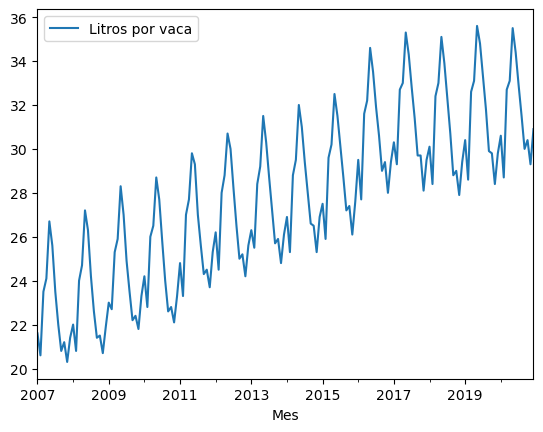

In [9]:
df_proyecto.plot()

In [10]:
serie_de_tiempo = df_proyecto["Litros por vaca"]
type(serie_de_tiempo)

pandas.core.series.Series

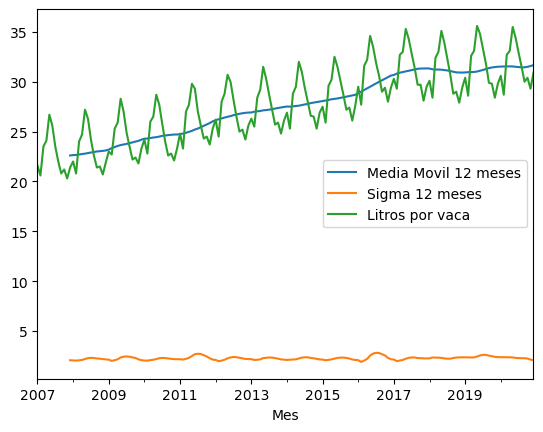

In [11]:
serie_de_tiempo.rolling(12).mean().plot(label="Media Movil 12 meses")
serie_de_tiempo.rolling(12).std().plot(label="Sigma 12 meses")
serie_de_tiempo.plot()
plt.legend()

### 5. Descomposición Estacional

In [14]:
estacional = seasonal_decompose(serie_de_tiempo, period=12)

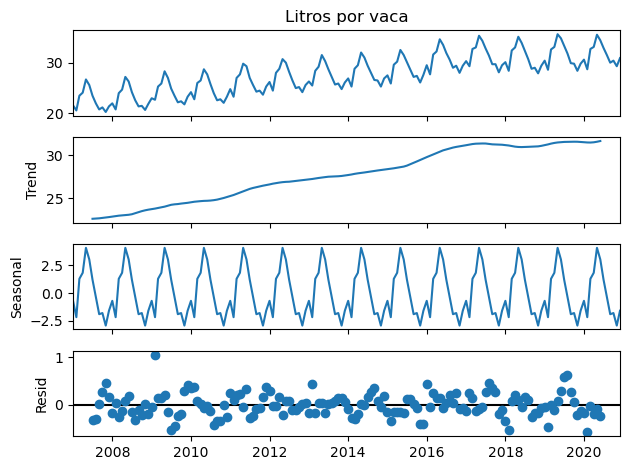

In [15]:
grafico_estacional = estacional.plot()